In [1]:
import seaborn as sns
from runco import config, sc
import datetime
import matplotlib.pyplot as plt
import numpy

sns.set_context('notebook')
sns.set_style('whitegrid')
%matplotlib notebook

In [2]:
results={'uB_BeamData_BEAM_BNB_TOR875/protons':{},
        }
last_n_days=7
plus_hours=6

In [3]:
conf = config.Config()
slowcon = sc.ConfiguredSlowControls(conf.data['slowcontrols'])
for key in results:
    results[key]['ch'] = slowcon.channel_id_by_name[key]

In [4]:
form = lambda x : x.strftime("%Y-%m-%d %H:%M:%S")

In [5]:
now = datetime.datetime.now()
one_week_ago = now - datetime.timedelta(days=last_n_days, hours=plus_hours)
for key in results:
    slowcon.query_timebinned_data(results[key]['ch'],1, form(one_week_ago), form(now))
    result = slowcon.cur.fetchall()
    results[key]['time'] = [datetime.datetime.fromtimestamp(i[1]) for i in result]
    results[key]['value'] = [i[2] for i in result]

<IPython.core.display.Javascript object>


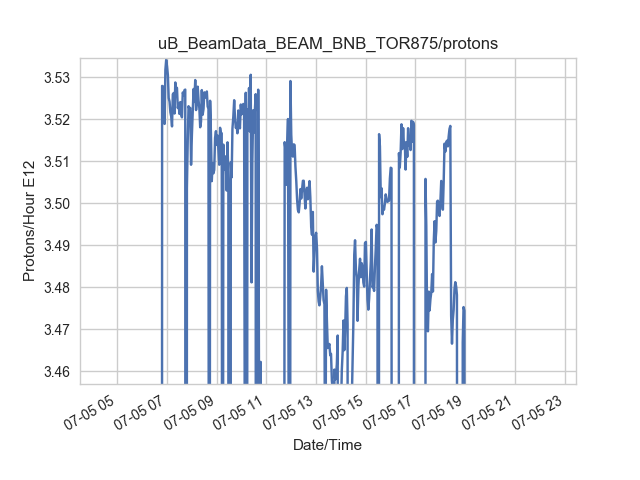

In [6]:
key = 'uB_BeamData_BEAM_BNB_TOR875/protons'
ax = plt.figure()
plt.plot(results[key]['time'],results[key]['value'])
plt.xlabel('Date/Time')
plt.ylabel('Protons/Hour E12')
plt.title(key)
ax.autofmt_xdate()